In [1]:
import tensorflow as tf
from tensorflow import keras

# Data Loading and Preprocessing

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
X_valid, X_train = X_train_full[:5000] , X_train_full[5000:]
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

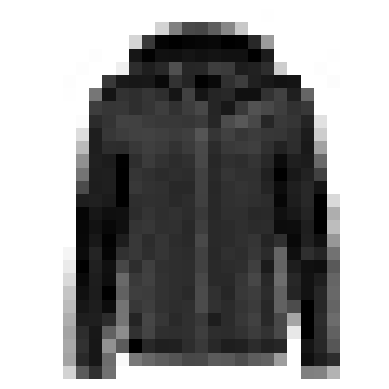

In [8]:
import matplotlib.pyplot as plt

some_obj = X_train[0]

plt.imshow(some_obj, cmap = 'binary') # to convert 2D numpy array to an image
plt.axis("off")
plt.show()

In [9]:
# since all the 'y' values are present in only decimal numerical format rather than object names so creating class names for all different objects.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

# CNN Sequential Model

In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
    # 64 filters, filter_size=7, stride=none/1 (coz input image not large), shape=[28, 28, 1] (coz grayscale image only 1 channel)
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 256)        

In [13]:
model.layers

In [14]:
hidden4 = model.layers[4]
hidden4.name

'max_pooling2d_4'

In [16]:
weights, biases = hidden4.get_weights()
weights.shape

# This throws error because Pooling layers have no parameters to learn like weights and biases. Only hyperparameter is the kernel size and once it's fixed, there is nothing to learn for the layer.

ValueError: not enough values to unpack (expected 2, got 0)

In [17]:
hidden6 = model.layers[6]
hidden6.name

'conv2d_9'

In [18]:
weights, biases = hidden6.get_weights()
weights.shape

# Weights has shape (height, widhth, no. of input layer channels, no. of filters). It is 4D tensor

(3, 3, 256, 256)

In [19]:
biases.shape

# Bias has shape (no. of filters). It is 1D tensor

(256,)

# Model Compilation

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# "sparse_catego..." because sparse models only i.e. single target class from 0 to 9 and are exclusive. If using one-hot vectors then need "catego..." or if doing binary classification in output layer then use "binary_cross..." loss.
# "sgd" performs back-propagation and has default "lr=0.01"

# Model Training

In [ ]:
model_train = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 361s 210ms/step - loss: 0.8001 - accuracy: 0.7115 - val_loss: 0.4453 - val_accuracy: 0.8264
Epoch 2/20
1719/1719 [==============================] - 314s 183ms/step - loss: 0.5873 - accuracy: 0.7924 - val_loss: 0.3883 - val_accuracy: 0.8670
Epoch 3/20
1719/1719 [==============================] - 309s 180ms/step - loss: 0.5035 - accuracy: 0.8249 - val_loss: 0.3537 - val_accuracy: 0.8724
Epoch 4/20
1719/1719 [==============================] - 317s 185ms/step - loss: 0.4532 - accuracy: 0.8434 - val_loss: 0.3197 - val_accuracy: 0.8806
Epoch 5/20
1719/1719 [==============================] - 317s 184ms/step - loss: 0.4166 - accuracy: 0.8572 - val_loss: 0.3142 - val_accuracy: 0.8832
Epoch 6/20
1719/1719 [==============================] - 321s 187ms/step - loss: 0.3884 - accuracy: 0.8678 - val_loss: 0.2867 - val_accuracy: 0.8954
Epoch 7/20
1719/1719 [==============================] - 344s 200ms/step - loss: 0.3629 - accuracy: 0.8769 - val_

# Learning Curves for the model

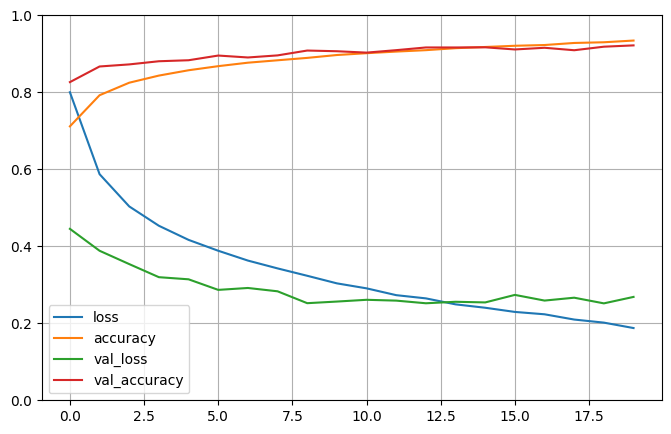

In [24]:
import pandas as pd

pd.DataFrame(model_train.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1) # set the y-axis range to [0-1]
plt.show()

# gca='Get Current Axes' provides a handle to the last active axes

# Model Evaluation

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 13s 40ms/step - loss: 0.3177 - accuracy: 0.9074


[0.3176578879356384, 0.9074000120162964]

# Prediction

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new) # gives proba of each class for each instance
y_proba.round(3)

1/1 [==============================] - 0s 499ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Saving the model

In [27]:
model.save("cnn_fashion_MNIST_model.h5")